# Supplemental Temperature Analyses
___

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from pathlib import Path
from utils import format_pval

SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


plt.rcParams['font.family'] = 'Arial'

## Datasets

In [7]:
data_root = Path("../data")

In [8]:
activity_df = pd.read_csv(data_root / "adk_ml_dataset.csv")

## kcat correlations with different Tgrowth assumptions
___

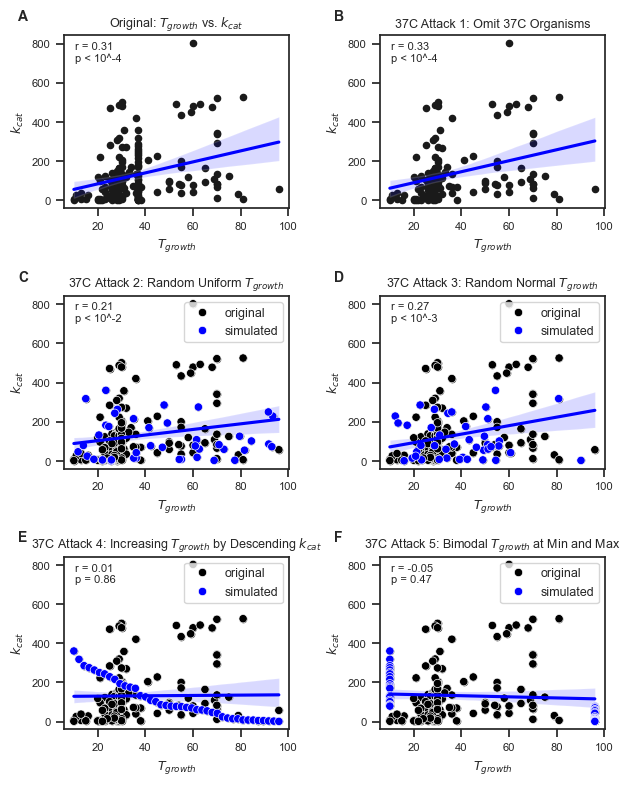

In [75]:
np.random.seed(42)

fig, axs = plt.subplots(3, 2, figsize=(6.5, 8))
sns.set_theme(style="ticks")
sns.set_context(rc={"axes.titlesize":9,
                    "axes.labelsize": 9,
                    "axes.legendsize": 8},)
#####################################
# All Organisms
#####################################

sns.regplot(data=activity_df,
    x="temperature", y="kcat_mean",
    scatter_kws={"s": 20, "color": "k", "alpha": 1.0 },
    line_kws={"color": "blue"},
    ci=95, ax=axs[0, 0])
r, p = stats.pearsonr(activity_df["temperature"], activity_df["kcat_mean"])
axs[0, 0].text(0.05, 0.85, f"r = {r:.2f}\n" + format_pval(p), transform=axs[0, 0].transAxes, fontsize=8)
axs[0, 0].set_xlabel("$T_{growth}$")
axs[0, 0].set_ylabel("$k_{cat}$")
axs[0, 0].set_title("Original: $T_{growth}$ vs. $k_{cat}$")

#####################################
# All Organisms Excluding 37C
#####################################

exclude_37 = activity_df[activity_df["temperature"] != 37].copy()
sns.regplot(data=exclude_37, 
    x="temperature", y="kcat_mean",
    scatter_kws={"s": 20, "color": "k", "alpha": 1.0 },
    line_kws={"color": "blue"},
    ci=95, ax=axs[0, 1])
r, p = stats.pearsonr(exclude_37["temperature"], exclude_37["kcat_mean"])
axs[0, 1].text(0.05, 0.85, f"r = {r:.2f}\n" + format_pval(p), transform=axs[0, 1].transAxes, fontsize=8)
axs[0, 1].set_xlabel("$T_{growth}$")
axs[0, 1].set_ylabel("$k_{cat}$")
axs[0, 1].set_title("37C Attack 1: Omit 37C Organisms")

#####################################
# 37C Orgs Random Uniform Temp
#####################################

temp37_df = activity_df[activity_df["temperature"] == 37].copy()

random_uniform_temp = np.random.uniform(min(activity_df["temperature"]), max(activity_df["temperature"]), len(temp37_df))
temp37_df["temperature"] = random_uniform_temp

temp37_df["simulated"] = "simulated"
exclude_37["simulated"] = "original"
# combine dataframes
combined_df = pd.concat([exclude_37, temp37_df])

sns.regplot(data=combined_df, 
    x="temperature", y="kcat_mean",
    scatter_kws={"s": 20, "color": "k", "alpha": 1.0},
    line_kws={"color": "blue"},
    ci=95, ax=axs[1, 0])
sns.scatterplot(data=combined_df,
    x="temperature", y="kcat_mean",
    hue="simulated", palette=["black", "blue"], legend=True, ax=axs[1, 0])
r, p = stats.pearsonr(combined_df["temperature"], combined_df["kcat_mean"])
axs[1, 0].text(0.05, 0.85, f"r = {r:.2f}\n" + format_pval(p), transform=axs[1, 0].transAxes, fontsize=8)
axs[1, 0].set_xlabel("$T_{growth}$")
axs[1, 0].set_ylabel("$k_{cat}$")
axs[1, 0].set_title("37C Attack 2: Random Uniform $T_{growth}$")

#####################################
# 37C Orgs Random Normal Temp
#####################################

random_normal_temp = np.random.normal(loc=activity_df["temperature"].mean(),
                                      scale=activity_df["temperature"].std(),
                                      size=len(temp37_df))
temp37_df["temperature"] = random_normal_temp

# combine dataframes
combined_df = pd.concat([exclude_37, temp37_df])
sns.regplot(data=combined_df,
    x="temperature", y="kcat_mean",
    scatter_kws={"s": 20, "color": "k", "alpha": 1.0},
    line_kws={"color": "blue"},
    ci=95, ax=axs[1, 1])
sns.scatterplot(data=combined_df,
    x="temperature", y="kcat_mean",
    hue="simulated", palette=["black", "blue"], legend=True, ax=axs[1, 1])
r, p = stats.pearsonr(combined_df["temperature"], combined_df["kcat_mean"])
axs[1, 1].text(0.05, 0.85, f"r = {r:.2f}\n" + format_pval(p), transform=axs[1, 1].transAxes, fontsize=8)
axs[1, 1].set_xlabel("$T_{growth}$")
axs[1, 1].set_ylabel("$k_{cat}$")
axs[1, 1].set_title("37C Attack 3: Random Normal $T_{growth}$",)


#####################################
# 37C Orgs Desc. kcat Asc. Tgrowth
#####################################

temp37_df = temp37_df.sort_values("kcat_mean", ascending=False)

ascending_temp = np.linspace(min(activity_df["temperature"]), max(activity_df["temperature"]), len(temp37_df))
temp37_df["temperature"] = ascending_temp

# combine dataframes
combined_df = pd.concat([exclude_37, temp37_df])

sns.regplot(data=combined_df, 
    x="temperature", y="kcat_mean",
    scatter_kws={"s": 20, "color": "k", "alpha": 1.0},
    line_kws={"color": "blue"},
    ci=95, ax=axs[2, 0])
sns.scatterplot(data=combined_df,
    x="temperature", y="kcat_mean",
    hue="simulated", palette=["black", "blue"], legend=True, ax=axs[2, 0])
r, p = stats.pearsonr(combined_df["temperature"], combined_df["kcat_mean"])
axs[2, 0].text(0.05, 0.85, f"r = {r:.2f}\n" + format_pval(p), transform=axs[2, 0].transAxes, fontsize=8)
axs[2, 0].set_xlabel("$T_{growth}$",)
axs[2, 0].set_ylabel("$k_{cat}$",)
axs[2, 0].set_title("37C Attack 4: Increasing $T_{growth}$ by Descending $k_{cat}$",)

#####################################
# 37C Orgs Bimodal Tgrowth
#####################################

bimodal_temp = [min(activity_df["temperature"])] * (len(temp37_df)//2) + ([ max(activity_df["temperature"])] * (len(temp37_df)//2 + 1))

temp37_df["temperature"] = bimodal_temp

# combine dataframes
combined_df = pd.concat([exclude_37, temp37_df])
sns.regplot(data=combined_df, 
    x="temperature", y="kcat_mean",
    scatter_kws={"s": 20, "color": "k", "alpha": 1.0},
    line_kws={"color": "blue"},
    ci=95, ax=axs[2, 1])
sns.scatterplot(data=combined_df,
    x="temperature", y="kcat_mean",
    hue="simulated", palette=["black", "blue"], legend=True, ax=axs[2, 1])
r, p = stats.pearsonr(combined_df["temperature"], combined_df["kcat_mean"])
axs[2, 1].text(0.05, 0.85, f"r = {r:.2f}\n" + format_pval(p), transform=axs[2, 1].transAxes, fontsize=8)
axs[2, 1].set_xlabel("$T_{growth}$",)
axs[2, 1].set_ylabel("$k_{cat}$",)
axs[2, 1].set_title("37C Attack 5: Bimodal $T_{growth}$ at Min and Max",)

plt.tight_layout()

# add subpanel labels
for ax, label in zip(axs.flat, ["A", "B", "C", "D", "E", "F"]):
    ax.tick_params(labelsize=8)
    ax.text(-0.2, 1.15, label, transform=ax.transAxes,
      fontsize=10, fontweight='bold', va='top', ha='left')
    if label in ["A", "B"]:
        continue
    try:
        ax.legend(fontsize=9)
        sns.move_legend(ax, "upper right", fontsize=9)
    except ValueError:
        pass


plt.savefig("/Users/duncanmuir/Desktop/adk_revisions/fig_pngs/temp_corr_supp.png", dpi=300, bbox_inches='tight')

# Check Robustness of Randomly Sampled Tgrowth

In [76]:
np.random.seed(42)
uniform_rs = []
random_rs = []

exclude_37 = activity_df[activity_df["temperature"] != 37].copy()
temp37_df = activity_df[activity_df["temperature"] == 37].copy()

for i in range(30):
    random_uniform_temp = np.random.uniform(min(activity_df["temperature"]), max(activity_df["temperature"]), len(temp37_df))
    temp37_df["temperature"] = random_uniform_temp
    combined_df = pd.concat([exclude_37, temp37_df])
    r, _ = stats.pearsonr(combined_df["temperature"], combined_df["kcat_mean"])
    uniform_rs.append(r)

    random_normal_temp = np.random.normal(loc=activity_df["temperature"].mean(),
                                            scale=activity_df["temperature"].mean(),
                                            size=len(temp37_df))
    temp37_df["temperature"] = random_normal_temp
    combined_df = pd.concat([exclude_37, temp37_df])
    r, _ = stats.pearsonr(combined_df["temperature"], combined_df["kcat_mean"])
    random_rs.append(r)


In [81]:
original_r, _ = stats.pearsonr(activity_df["temperature"], activity_df["kcat_mean"])


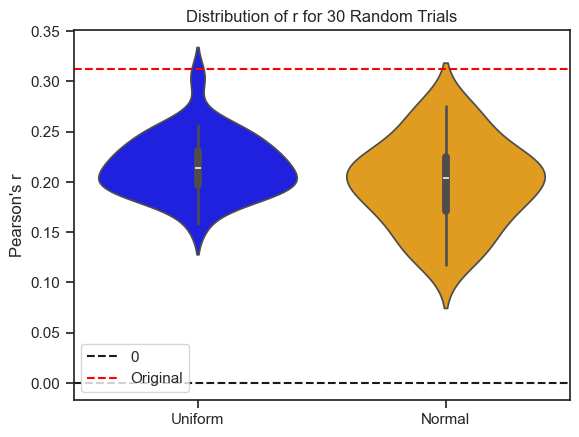

In [ ]:
sns.violinplot(data=[uniform_rs, random_rs], palette=["blue", "orange"])
plt.xticks([0, 1], ["Uniform", "Normal"])
plt.axhline(0, color="k", linestyle="--")
plt.axhline(original_r, color="red", linestyle="--", label="Original")
plt.axhline
plt.ylabel("Pearson's r")
plt.title("Distribution of r for 30 Random Trials")
plt.legend(loc="lower left")
plt.show()